In [1]:
import os, sys, inspect
cmd_subfolder = os.path.realpath(os.path.abspath(os.path.join(os.path.split(inspect.getfile( inspect.currentframe() ))[0],"Python3")))
if cmd_subfolder not in sys.path:
    sys.path.insert(0, cmd_subfolder)

import numpy as np
# import solver
# from Python3.dfo_tr import dfo_tr
from Python3_experimental.dfo_tr import dfo_tr
# import blackbox functions
from funcs_def import arwhead, rosen

In [2]:
# choose function
func = arwhead
# func = rosen

# starting point
x0 = np.ones(10) * 0.5
# x0 = np.repeat(np.array([[-1.2, 1]]), 2, axis=0).flatten()

# bounds
bounds = None
# bounds = [(-3,0.9)]*20

# overwrite default settings
customOptions = {'alg_model': 'quadratic',
                'alg_TR': 'ball', 
                'alg_TRsub': 'exact',
                'tr_delta': 0.5, 
                'sample_toremove': 20,
                'stop_nfeval': 128,
                'stop_predict': 0.,
                'verbosity': 2
                }

In [7]:
hist_x = np.array([])
hist_fx = np.array([])
hist_phix = np.array([])

# optimization in ask and tell frameword
optimizer = dfo_tr(x0, options=customOptions)
while True:
    x = optimizer.ask(4)
    fx = [func(xi) + 1.0 * np.random.randn() for xi in x]
    hist_x = np.append(hist_x, x)
    hist_fx = np.append(hist_fx, fx)
    hist_phix = np.append(hist_phix, [func(xi) for xi in x])
    optimizer.tell(x,fx)
    if optimizer._stop():
        break


 Iteration Report 
|  iter |suc|  objective  | TR_radius |    rho    | m  |
|     0 |---| 1.01896e+01 |  0.500000 | --------- | 11 
|     1 | 0 | 1.11100e+01 |  0.475000 | -0.222793 | 15 |
|     2 | 1 | 8.51341e+00 |  0.475000 |  0.159774 | 19 |
|     3 | 1 | 8.24463e+00 |  0.475000 |  0.016480 | 23 |
|     4 | 1 | 6.78406e+00 |  0.475000 |  0.062194 | 27 |
|     5 | 0 | 8.38699e+00 |  0.451250 | -0.047610 | 31 |
|     6 | 0 | 9.11439e+00 |  0.428687 | -0.117756 | 35 |
|     7 | 0 | 8.81159e+00 |  0.407253 | -0.145978 | 39 |
|     8 | 1 | 6.45576e+00 |  0.407253 |  0.096251 | 43 |
|     9 | 0 | 9.11819e+00 |  0.386890 | -0.170694 | 47 |
|    10 | 0 | 7.60043e+00 |  0.367546 | -0.050892 | 51 |
|    11 | 0 | 7.64396e+00 |  0.349169 | -0.056496 | 55 |
|    12 | 0 | 7.46846e+00 |  0.331710 | -0.058427 | 59 |
|    13 | 1 | 5.18389e+00 |  0.431223 |  0.543010 | 63 |
|    14 | 1 | 4.80348e+00 |  0.431223 |  0.104519 | 66 |
|    15 | 1 | 2.59579e-01 |  0.560590 |  0.556858 | 66 |
|    16 | 0 

In [8]:
idx = np.nanargmin(hist_phix)
x = hist_phix[idx]
fx = hist_phix[idx]

# print result
print("Printing result for function " + func.__name__ + ":")
print("best point: {}, with obj: {:.6f}".format(
    np.around(x, decimals=5), float(fx)))

Printing result for function arwhead:
best point: 2.21438, with obj: 2.214375


# Make plots.

In [5]:
import matplotlib.pyplot as plt 
import matplotlib.animation as animation

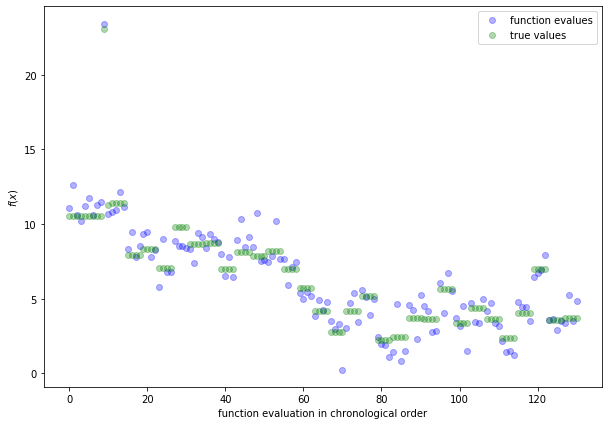

In [11]:
plt.rcParams['figure.figsize'] = [10,7]
plt.plot(range(len(hist_fx)), hist_fx, 'bo', alpha=0.3, label='function evalues')
plt.plot(range(len(hist_fx)), hist_phix, 'go', alpha=0.3, label='true values')
# plt.plot(range(len(history_f)), np.array(list(accumulate(true_values, min))))
plt.legend()
plt.xlabel('function evaluation in chronological order')
plt.ylabel('$f(x)$')
plt.show()

Traceback (most recent call last):
  File "/Users/liyuancao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/Users/liyuancao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 953, in _start
    self._init_draw()
  File "/Users/liyuancao/opt/anaconda3/lib/python3.7/site-packages/matplotlib/animation.py", line 1740, in _init_draw
    for a in self._drawn_artists:
TypeError: 'PathCollection' object is not iterable


RuntimeError: Requested MovieWriter (ffmpeg) not available

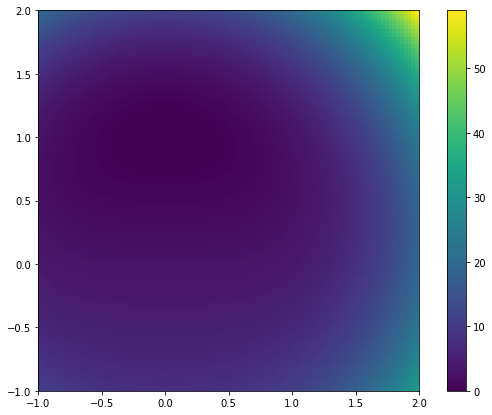

In [23]:

fig, ax = plt.subplots()
## heatmap of the function 
lb = [-1, -1]
ub = [2,2]
x1 = np.linspace(lb[0],ub[0],100)
x2 = np.linspace(lb[1],ub[1],100)
### filling the heatmap, value by value
fun_map = np.empty((x1.size, x2.size))
for i in range(x1.size):
    for j in range(x2.size):
        fun_map[i,j] = func(np.array([x1[i], x2[j]]))
### plot heatmap
im = ax.imshow(
    fun_map,
    extent=(lb[0], ub[0], lb[1], ub[1]),
    origin='lower')
fig.colorbar(im)

scat = ax.scatter([], [], c='w', alpha=0.4, label='current')
# scat0 = ax.scatter([], [], c='g', alpha=0.1, label='past')
scat_best = ax.scatter([], [], c='r', alpha=0.4)

def setup_plot():
    """Initial drawing of the scatter plot."""
    ax.axis([lb[0], ub[0], lb[1], ub[1]])
    scat = ax.scatter([], [], c='w', alpha=0.4, label='current')

    # For FuncAnimation's sake, we need to return the artist we'll be using
    # Note that it expects a sequence of artists, thus the trailing comma.
    return scat

def update(i):
    """Update the scatter plot."""

    # Set x and y data for the current location of the population. 
    data = np.array(hist_x)[8*i:8*(i+1)]
    scat.set_offsets(data)

    # We need to return the updated artist for FuncAnimation to draw..
    # Note that it expects a sequence of artists, thus the trailing comma.
    return scat

ani = animation.FuncAnimation(fig, update, interval=400, frames=16, init_func=setup_plot, blit=True)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
ani.save('DFO-TR.gif', writer='writer')
plt.show()

In [22]:
!conda install -c conda-forge ffmpeg


Solving environment: done

## Package Plan ##

  environment location: /Users/liyuancao/opt/anaconda3

  added / updated specs:
    - ffmpeg


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ffmpeg-4.2.2               |       h97e5cf8_0        22.9 MB
    gnutls-3.6.5               |    h91ad68e_1002         1.6 MB
    lame-3.100                 |    h1de35cc_1001         527 KB  conda-forge
    libopus-1.3.1              |       h1de35cc_0         480 KB
    libvpx-1.7.0               |       h378b8a2_0         1.3 MB
    nettle-3.4.1               |    h3efe00b_1002         1.0 MB  conda-forge
    openh264-2.1.0             |       hd9629dc_0         635 KB
    x264-1!157.20191217        |       h1de35cc_0         910 KB
    ------------------------------------------------------------
                                           Total:        29.3 MB

The following NEW packages will be I